## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ISMAIL\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Read the Data


In [3]:
df = pd.read_csv(r"C:\Users\ISMAIL\OneDrive\Documents\datasets\1.1 data_banknote_authentication.csv")
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.isnull().any()

Variance_Wavelet    False
Skewness_Wavelet    False
Curtosis_Wavelet    False
Image_Entropy       False
Class               False
dtype: bool

In [5]:
df =  df.astype('float32')

## EDA and Visualization

In [6]:
df.shape

(1372, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float32
 1   Skewness_Wavelet  1372 non-null   float32
 2   Curtosis_Wavelet  1372 non-null   float32
 3   Image_Entropy     1372 non-null   float32
 4   Class             1372 non-null   float32
dtypes: float32(5)
memory usage: 26.9 KB


In [8]:
df.describe()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191656,0.444606
std,2.842762,5.869048,4.310030,2.101013,0.497105
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927401,2.449500,1.000000


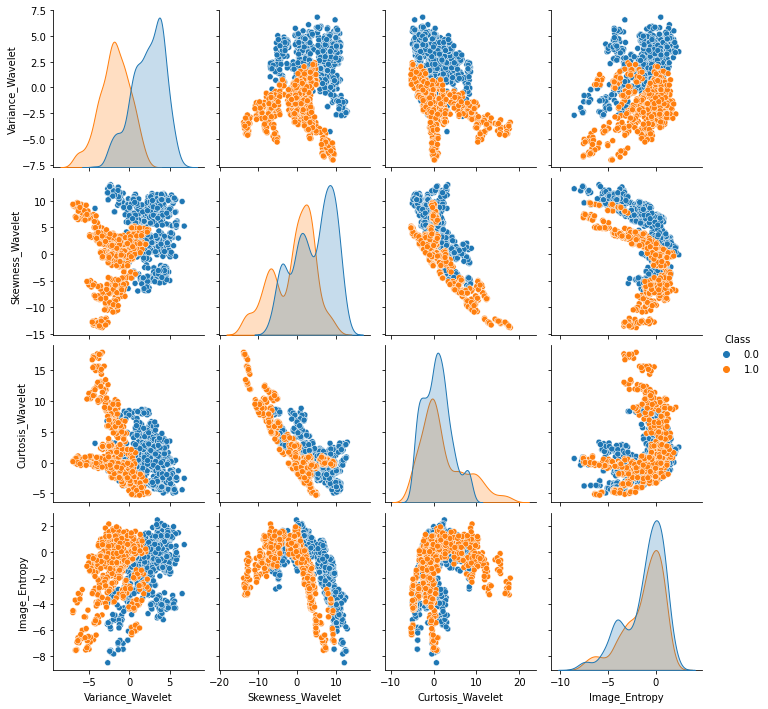

In [9]:
sns.pairplot(df, hue = 'Class')

In [10]:
df.corr().round(2)

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
Variance_Wavelet,1.00,0.26,-0.38,0.28,-0.72
Skewness_Wavelet,0.26,1.00,-0.79,-0.53,-0.44
Curtosis_Wavelet,-0.38,-0.79,1.00,0.32,0.16
Image_Entropy,0.28,-0.53,0.32,1.00,-0.02
Class,-0.72,-0.44,0.16,-0.02,1.00


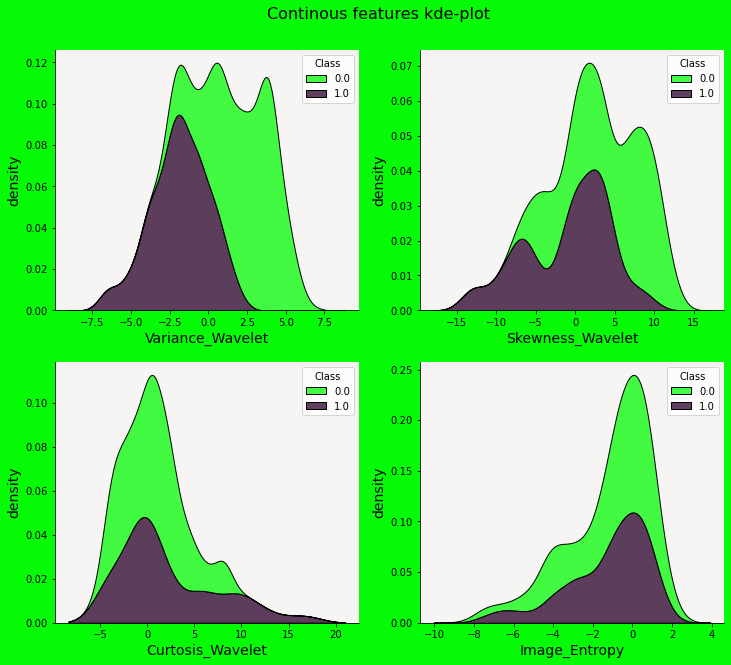

In [11]:
#mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
mypal= ['#FC05FB', '#05fc06', '#FCD2FC','#F3FEFA', '#B4FFE4','#290029']
labels =  ["Variance_Wavelet", "Skewness_Wavelet",	"Curtosis_Wavelet",	"Image_Entropy"]
L = len(labels)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L
fig, ax = plt.subplots(nrow, ncol, figsize=(12, 10),facecolor='#05fc06')
fig.subplots_adjust(top=0.92)
i = 1
for col in labels:
    plt.subplot(nrow, ncol, i, facecolor = '#F6F5F4')
    ax = sns.kdeplot(data=df, x=col, hue="Class", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel("density", fontsize=14)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    i = i +1
    
plt.suptitle('Continous features kde-plot' , fontsize = 16) ;

<AxesSubplot:xlabel='Curtosis_Wavelet', ylabel='Skewness_Wavelet'>

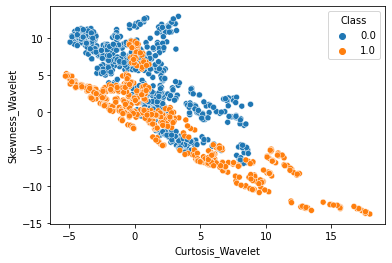

In [12]:
sns.scatterplot(x = "Curtosis_Wavelet", y = "Skewness_Wavelet", hue = "Class", data = df )

In [13]:
X = df.drop(labels = 'Class', axis = 1)
y = df['Class']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X = scaler.fit_transform (X)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print('Test_Set')
    
    print(confusion_matrix(y_test, y_pred))
    
    print(classification_report(y_test, y_pred))
    
    print()
    
    print('Training_Set')
    
    print(confusion_matrix(y_train, y_train_pred))
    
    print(classification_report(y_train, y_train_pred))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 101)

In [18]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [19]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred) 
eval_metric(rf_model, X_train, y_train, X_test, y_test)


Test_Set
[[161   4]
 [  0 110]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       165
         1.0       0.96      1.00      0.98       110

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.98       275
weighted avg       0.99      0.99      0.99       275


Training_Set
[[597   0]
 [  0 500]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       597
         1.0       1.00      1.00      1.00       500

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



In [20]:
#Grid Search with random forest
rf = RandomForestClassifier(random_state = 42)
param_grid = {
    'n_estimators' : [20, 50, 75],
    'max_features' : ['auto', 'sqrt', 'log 2'],
    'max_depth' : [6, 7, 8], 
    'criterion' : ['gini', 'entropy']
}
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
rf_grid.fit(X_train, y_train)

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log 2'],
                         'n_estimators': [20, 50, 75]})

In [21]:
rf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 20}

In [22]:
rf_grid.best_score_

0.9963553341635535

In [23]:
y_pred = rf_grid.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred) 
eval_metric(rf_model, X_train, y_train, X_test, y_test)



Test_Set
[[161   4]
 [  0 110]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       165
         1.0       0.96      1.00      0.98       110

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.98       275
weighted avg       0.99      0.99      0.99       275


Training_Set
[[597   0]
 [  0 500]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       597
         1.0       1.00      1.00      1.00       500

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



In [28]:
y_train_pred = rf_grid.predict(X_train)
y_pred = rf_grid.predict(X_test)
rf_scores = {"rf_train": {"accuracy" : accuracy_score(y_train, y_train_pred),"recall"   : recall_score(y_train, y_train_pred),"precision": precision_score(y_train, y_train_pred),
            "f1-score" : f1_score(y_train, y_train_pred)} ,"rf_test": {"accuracy" : accuracy_score(y_test, y_pred),"recall" : recall_score(y_test, y_pred),"precision" : precision_score(y_test, y_pred),"f1-score" : f1_score(y_test, y_pred)}}
df_rf =pd.DataFrame(rf_scores)
df_rf

,rf_train,rf_test
accuracy,1.0,0.985455
recall,1.0,1.000000
precision,1.0,0.964912
f1-score,1.0,0.982143


In [29]:
#Feature Importance
model = RandomForestClassifier(n_estimators= 75, random_state= 42)
model.fit(X_train, y_train)
model.feature_importances_
feats = pd.DataFrame(index = labels, data = model.feature_importances_, columns =["rf_importance"])
rf_imp_feats = feats.sort_values("rf_importance")
rf_imp_feats

,rf_importance
Image_Entropy,0.052943
Curtosis_Wavelet,0.166456
Skewness_Wavelet,0.222767
Variance_Wavelet,0.557834


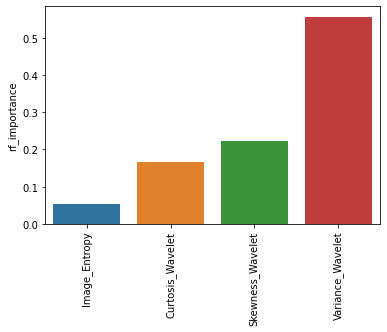

In [30]:
#plotting it on a barplot
sns.barplot(data=rf_imp_feats, x=rf_imp_feats.index,y='rf_importance')
plt.xticks(rotation=90);

In [31]:
#Evaluating ROC curves and AUC
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

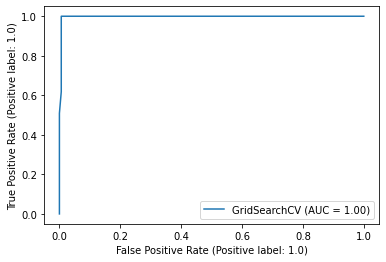

In [32]:
plot_roc_curve(rf_grid, X_test, y_test);

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt_model = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred) 
eval_metric(dt_model, X_train, y_train, X_test, y_test)


Test_Set
[[161   4]
 [  1 109]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       165
         1.0       0.96      0.99      0.98       110

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275


Training_Set
[[597   0]
 [  0 500]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       597
         1.0       1.00      1.00      1.00       500

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



In [35]:
#GridSearch with desicion tree
dt = DecisionTreeClassifier(random_state = 42)
param_grid = {
    
    'max_features' : ['auto', 'sqrt', 'log 2'],
    'max_depth' : [6, 7, 8], 
    'criterion' : ['gini', 'entropy']
}
dt_grid = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5)
dt_grid.fit(X_train, y_train)

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 264, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 264, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 264, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log 2']})

In [36]:
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto'}

In [37]:
dt_grid.best_score_

0.9872395184723952

In [38]:
y_pred = dt_grid.predict(X_test)
dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred) 
eval_metric(dt_grid, X_train, y_train, X_test, y_test)



Test_Set
[[160   5]
 [  0 110]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       165
         1.0       0.96      1.00      0.98       110

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275


Training_Set
[[597   0]
 [  0 500]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       597
         1.0       1.00      1.00      1.00       500

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



In [39]:
y_train_pred = dt_grid.predict(X_train)
y_pred = dt_grid.predict(X_test)
dt_scores = {"dt_train": {"accuracy" : accuracy_score(y_train, y_train_pred),"recall"   : recall_score(y_train, y_train_pred),"precision": precision_score(y_train, y_train_pred),
            "f1-score" : f1_score(y_train, y_train_pred)} ,"dt_test": {"accuracy" : accuracy_score(y_test, y_pred),"recall" : recall_score(y_test, y_pred),"precision" : precision_score(y_test, y_pred),"f1-score" : f1_score(y_test, y_pred)}}
df_dt =pd.DataFrame(dt_scores)
df_dt

,dt_train,dt_test
accuracy,1.0,0.981818
recall,1.0,1.000000
precision,1.0,0.956522
f1-score,1.0,0.977778


In [40]:
#Feature Importance
model = DecisionTreeClassifier( random_state= 42)
model.fit(X_train, y_train)
model.feature_importances_
feats = pd.DataFrame(index = labels, data = model.feature_importances_, columns =["dt_importance"])
dt_imp_feats = feats.sort_values("dt_importance")
dt_imp_feats

,dt_importance
Image_Entropy,0.020384
Curtosis_Wavelet,0.158779
Skewness_Wavelet,0.212488
Variance_Wavelet,0.608349


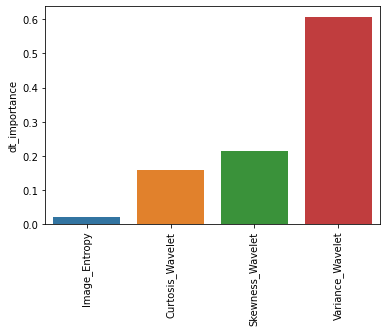

In [41]:
#plotting it on a barplot
sns.barplot(data=dt_imp_feats, x=dt_imp_feats.index,y='dt_importance')
plt.xticks(rotation=90);

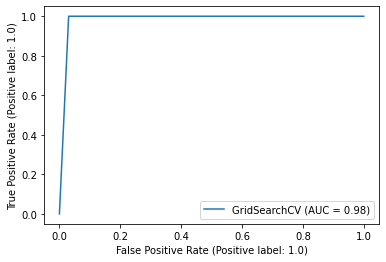

In [42]:
plot_roc_curve(dt_grid, X_test, y_test);

In [43]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = log_model.predict(X_test)
log_model_f1 = f1_score(y_test, y_pred)
log_model_recall = recall_score(y_test, y_pred)
log_model_auc = roc_auc_score(y_test, y_pred) 
eval_metric(log_model, X_train, y_train, X_test, y_test)


Test_Set
[[162   3]
 [  0 110]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       165
         1.0       0.97      1.00      0.99       110

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275


Training_Set
[[577  20]
 [  2 498]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       597
         1.0       0.96      1.00      0.98       500

    accuracy                           0.98      1097
   macro avg       0.98      0.98      0.98      1097
weighted avg       0.98      0.98      0.98      1097



In [45]:
y_train_pred = log_model.predict(X_train)
y_pred = log_model.predict(X_test)
log_scores = {"log_train": {"accuracy" : accuracy_score(y_train, y_train_pred),"recall"   : recall_score(y_train, y_train_pred),"precision": precision_score(y_train, y_train_pred),
            "f1-score" : f1_score(y_train, y_train_pred)} ,"log_test": {"accuracy" : accuracy_score(y_test, y_pred),"recall" : recall_score(y_test, y_pred),"precision" : precision_score(y_test, y_pred),"f1-score" : f1_score(y_test, y_pred)}}
df_log =pd.DataFrame(log_scores)
df_log

,log_train,log_test
accuracy,0.979945,0.989091
recall,0.996000,1.000000
precision,0.961390,0.973451
f1-score,0.978389,0.986547


In [46]:
#K-Nearest Neighbours (KNN)
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn_model = KNeighborsClassifier(n_neighbors= 5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [48]:

y_pred = knn_model.predict(X_test)
knn_model_f1 = f1_score(y_test, y_pred)
knn_model_recall = recall_score(y_test, y_pred)
knn_model_auc = roc_auc_score(y_test, y_pred) 
eval_metric(knn_model, X_train, y_train, X_test, y_test)


Test_Set
[[164   1]
 [  0 110]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       165
         1.0       0.99      1.00      1.00       110

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275


Training_Set
[[596   1]
 [  0 500]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       597
         1.0       1.00      1.00      1.00       500

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



In [49]:
#GridSearch with KNN
from sklearn.model_selection import GridSearchCV
knn_grid  = KNeighborsClassifier()
k_values = (1, 20)
param_grid = {'n_neighbors' : k_values, 'p' : [1,2], 'weights':['uniform', 'distance']}
knn_grid = GridSearchCV(knn_grid,param_grid, cv = 10, scoring = 'accuracy')
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (1, 20), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [50]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=1, p=1)

In [51]:
knn_grid.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [52]:
knn = KNeighborsClassifier(n_neighbors= 6, p = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [53]:
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[164   1]
 [  0 110]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       165
         1.0       0.99      1.00      1.00       110

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275


Training_Set
[[596   1]
 [  0 500]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       597
         1.0       1.00      1.00      1.00       500

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



In [54]:
y_train_pred = knn_grid.predict(X_train)
y_pred = knn_grid.predict(X_test)
knn_grid_scores = {"knn_train": {"accuracy" : accuracy_score(y_train, y_train_pred),"recall"   : recall_score(y_train, y_train_pred),"precision": precision_score(y_train, y_train_pred),
            "f1-score" : f1_score(y_train, y_train_pred)} ,"knn_test": {"accuracy" : accuracy_score(y_test, y_pred),"recall" : recall_score(y_test, y_pred),"precision" : precision_score(y_test, y_pred),"f1-score" : f1_score(y_test, y_pred)}}
df_knn =pd.DataFrame(knn_grid_scores)
df_knn

,knn_train,knn_test
accuracy,1.0,0.996364
recall,1.0,1.000000
precision,1.0,0.990991
f1-score,1.0,0.995475


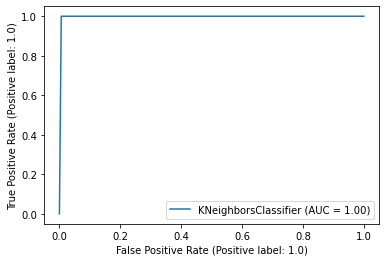

In [55]:
#Evaluating ROC curves and AUC
plot_roc_curve(knn_model, X_test, y_test);

In [56]:
#Support vactor Machines
from sklearn.svm import SVC
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred) 
eval_metric(svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[165   0]
 [  0 110]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       165
         1.0       1.00      1.00      1.00       110

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275


Training_Set
[[597   0]
 [  0 500]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       597
         1.0       1.00      1.00      1.00       500

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



In [57]:
#GridSearchCV with SVM
from sklearn.model_selection import GridSearchCV


In [58]:
#GridSearchCV with SVM
model = SVC(random_state = 42)
svm = SVC()
param_grid = {'C' : [1, 10, 10, 0], 'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 'degree' : [1, 2]}
grid = GridSearchCV(model, param_grid)
grid.fit(X_train, y_train)

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Est

C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ISMAIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Est

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [1, 10, 10, 0], 'degree': [1, 2],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [59]:
grid.best_params_

{'C': 1, 'degree': 1, 'kernel': 'rbf'}

In [60]:
grid.best_score_

1.0

In [61]:
grid.best_estimator_

SVC(C=1, degree=1, random_state=42)

In [62]:
grid_f1 = f1_score(y_test, y_pred)
grid_recall = recall_score(y_test, y_pred)
grid_auc = roc_auc_score(y_test, y_pred)
eval_metric(grid, X_train, y_train, X_test, y_test)

Test_Set
[[165   0]
 [  0 110]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       165
         1.0       1.00      1.00      1.00       110

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275


Training_Set
[[597   0]
 [  0 500]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       597
         1.0       1.00      1.00      1.00       500

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



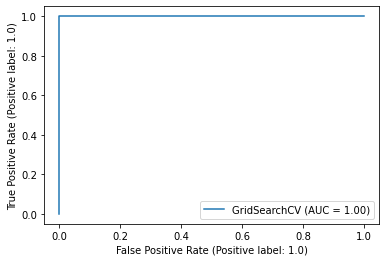

In [63]:
#Evaluating ROC curves and AUC
plot_roc_curve(grid, X_test, y_test);

In [77]:
y_train_pred = grid.predict(X_train)
y_pred = grid.predict(X_test)
grid_scores = {"SVC_train": {"accuracy" : accuracy_score(y_train, y_train_pred),"recall"   : recall_score(y_train, y_train_pred),"precision": precision_score(y_train, y_train_pred),
            "f1-score" : f1_score(y_train, y_train_pred)} ,"SVC_test": {"accuracy" : accuracy_score(y_test, y_pred),"recall" : recall_score(y_test, y_pred),"precision" : precision_score(y_test, y_pred),"f1-score" : f1_score(y_test, y_pred)}}
df_SVC =pd.DataFrame(grid_scores)
df_SVC

,SVC_train,SVC_test
accuracy,1.0,1.0
recall,1.0,1.0
precision,1.0,1.0
f1-score,1.0,1.0


## Comparing Models All Best Hyperparameters Models

In [78]:
y = pd.concat([df_rf, df_dt,df_log,df_knn,df_SVC ], axis = 1)
y


,rf_train,rf_test,dt_train,dt_test,log_train,log_test,knn_train,knn_test,SVC_train,SVC_test
accuracy,1.0,0.985455,1.0,0.981818,0.979945,0.989091,1.0,0.996364,1.0,1.0
recall,1.0,1.000000,1.0,1.000000,0.996000,1.000000,1.0,1.000000,1.0,1.0
precision,1.0,0.964912,1.0,0.956522,0.961390,0.973451,1.0,0.990991,1.0,1.0
f1-score,1.0,0.982143,1.0,0.977778,0.978389,0.986547,1.0,0.995475,1.0,1.0


In [79]:
df_train=y.iloc[:,:-1:2]
df_train_scores=df_train.T
df_train_scores

,accuracy,recall,precision,f1-score
rf_train,1.000000,1.000,1.00000,1.000000
dt_train,1.000000,1.000,1.00000,1.000000
log_train,0.979945,0.996,0.96139,0.978389
knn_train,1.000000,1.000,1.00000,1.000000
SVC_train,1.000000,1.000,1.00000,1.000000


In [80]:
df_test=y.iloc[:,:-1:2]
df_test_scores=df_test.T
df_test_scores

,accuracy,recall,precision,f1-score
rf_train,1.000000,1.000,1.00000,1.000000
dt_train,1.000000,1.000,1.00000,1.000000
log_train,0.979945,0.996,0.96139,0.978389
knn_train,1.000000,1.000,1.00000,1.000000
SVC_train,1.000000,1.000,1.00000,1.000000


# Models Comparison

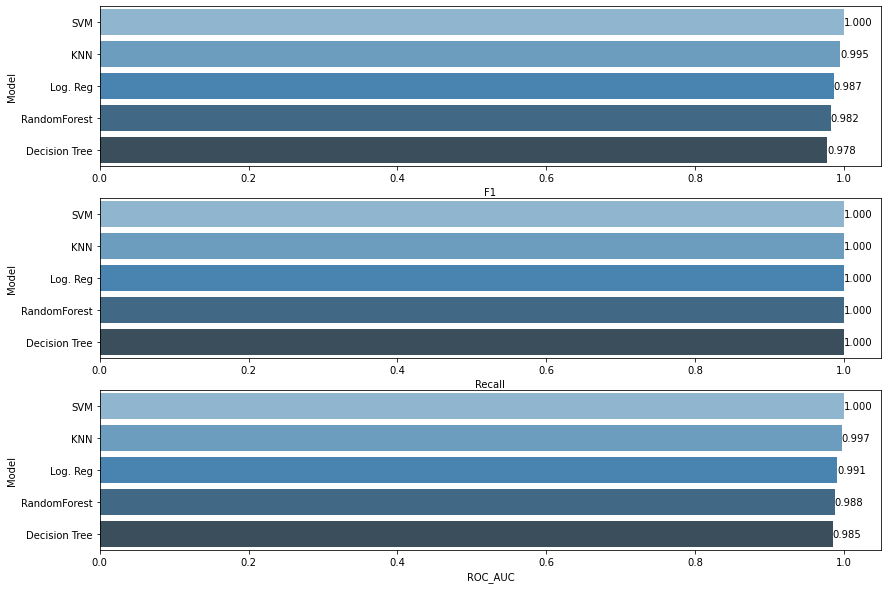

In [81]:
#Model Comparison
compare = pd.DataFrame({"Model": ["Log. Reg","KNN",  "SVM","Decision Tree", "RandomForest"],
                        "F1": [log_model_f1, knn_model_f1, svc_f1, dt_f1, rf_f1], 'Recall':[log_model_recall, knn_model_recall, svc_recall, dt_recall, rf_recall], 'ROC_AUC' : [log_model_auc, knn_model_auc, svc_auc, dt_auc, rf_auc]})
def labels(ax):
    for p in ax.patches:
        width = p.get_width() 
        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),# set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)

ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

Text(0.5, 1.0, 'Test Scores by Models')

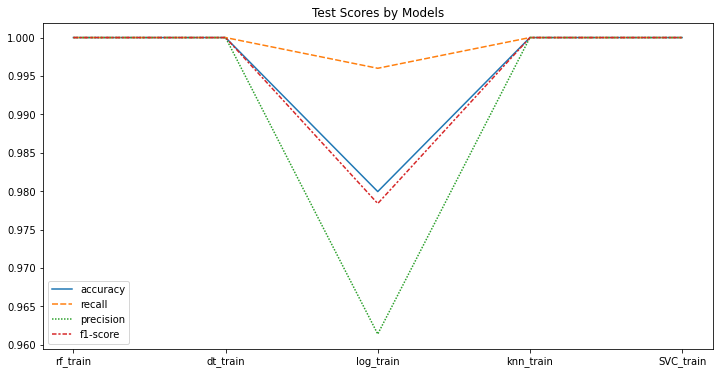

In [82]:
plt.figure(figsize=(12,6))
sns.lineplot(data = df_test_scores.iloc[:,:4]);
plt.title("Test Scores by Models")

Text(0.5, 1.0, 'Train Scores by Model')

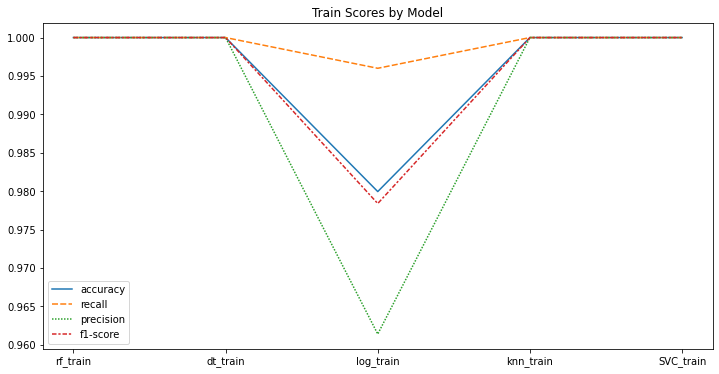

In [83]:
plt.figure(figsize=(12,6))
sns.lineplot(data = df_train_scores.iloc[:,:4]);
plt.title("Train Scores by Model")

In [85]:
#Concluding Remarks
#The models applied were logistic regression, k-nearest neigbors, SVM, decision tree, random forest. we detremined the correlation between features and the target variable.
# - Our best models happens to be k-nearest neighbors and SVM 